"Latihan Deteksi Berita Palsu"

In [ ]:
#Data Pre-processing
#Importing required libraries
#Data Pre-processing
import numpy as np 
import pandas as pd
#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 
#Handling Warnings
import warnings
warnings.filterwarnings('ignore')
#Text pre-processing
import string
string.punctuation
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
#Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('Tugas/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
df = df.fillna('Not Available')

In [6]:
df['news'] = df['title'] +'\n '+ df['text']

In [7]:
print(df['news'][0])

House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
 House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Inte

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20800 non-null  object
 2   author  20800 non-null  object
 3   text    20800 non-null  object
 4   label   20800 non-null  int64 
 5   news    20800 non-null  object
dtypes: int64(2), object(4)
memory usage: 975.1+ KB


In [9]:
df.shape

(20800, 6)

In [10]:
df.columns

Index(['id', 'title', 'author', 'text', 'label', 'news'], dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=20800, step=1)

In [15]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [14]:
#Dropping unwanted columns
df.drop(['id','author','news'],axis=1,inplace=True)
df.head()

KeyError: "['id', 'author', 'news'] not found in axis"

In [16]:
df.rename(columns={'title':'headings'},inplace=True)    
df.head()

,headings,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [17]:
df.duplicated().sum()

110

In [18]:
df.drop_duplicates(inplace=True)
df.shape

(20690, 3)

In [19]:
print(df['label'].value_counts())
fig = px.histogram(df,x=df['label'],color="label",text_auto=True,color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(title="label Count",xaxis_title="label",yaxis_title="Count")
fig.show()

label
0    10387
1    10303
Name: count, dtype: int64


In [21]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df[['headings','text']] = df[['headings','text']].applymap(lambda x:remove_punctuation(x))
df.head()

,headings,text,label
0,House Dem Aide We Didn’t Even See Comey’s Lett...,House Dem Aide We Didn’t Even See Comey’s Lett...,1
1,FLYNN Hillary Clinton Big Woman on Campus Bre...,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Why the Truth Might Get You Fired October 29 2...,1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [23]:
df[['headings','text']] = df[['headings','text']].applymap(lambda x:x.lower())
df.head()

,headings,text,label
0,house dem aide we didn’t even see comey’s lett...,house dem aide we didn’t even see comey’s lett...,1
1,flynn hillary clinton big woman on campus bre...,ever get the feeling your life circles the rou...,0
2,why the truth might get you fired,why the truth might get you fired october 29 2...,1
3,15 civilians killed in single us airstrike hav...,videos 15 civilians killed in single us airstr...,1
4,iranian woman jailed for fictional unpublished...,print \nan iranian woman has been sentenced to...,1


In [24]:
def tokenization(text1):
    tokens = re.split('\s+',''.join(text1))
    return tokens
df[['headings','text']] = df[['headings','text']].applymap(lambda x:tokenization(x))
df.head()

,headings,text,label
0,"[house, dem, aide, we, didn’t, even, see, come...","[house, dem, aide, we, didn’t, even, see, come...",1
1,"[flynn, hillary, clinton, big, woman, on, camp...","[ever, get, the, feeling, your, life, circles,...",0
2,"[why, the, truth, might, get, you, fired]","[why, the, truth, might, get, you, fired, octo...",1
3,"[15, civilians, killed, in, single, us, airstr...","[videos, 15, civilians, killed, in, single, us...",1
4,"[iranian, woman, jailed, for, fictional, unpub...","[print, an, iranian, woman, has, been, sentenc...",1


In [26]:
from nltk.corpus  import stopwords
from nltk.stem.porter import PorterStemmer

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Kaprodi SIA
[nltk_data]     Sukabumi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
#Stop words removal
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(texts):
    output= [i for i in texts if i not in stopwords]
    return output
df[['headings','text']] = df[['headings','text']].applymap(lambda x:remove_stopwords(x))
df.head()

,headings,text,label
0,"[house, dem, aide, didn’t, even, see, comey’s,...","[house, dem, aide, didn’t, even, see, comey’s,...",1
1,"[flynn, hillary, clinton, big, woman, campus, ...","[ever, get, feeling, life, circles, roundabout...",0
2,"[truth, might, get, fired]","[truth, might, get, fired, october, 29, 2016, ...",1
3,"[15, civilians, killed, single, us, airstrike,...","[videos, 15, civilians, killed, single, us, ai...",1
4,"[iranian, woman, jailed, fictional, unpublishe...","[print, iranian, woman, sentenced, six, years,...",1


In [30]:
#Stemming
porter_stemmer = PorterStemmer()
def stemming(texts):
    stem_text = [porter_stemmer.stem(word) for word in texts]
    return stem_text
df[['headings','text']] = df[['headings','text']].applymap(lambda x: stemming(x))
df.head()

,headings,text,label
0,"[hous, dem, aid, didn’t, even, see, comey’, le...","[hous, dem, aid, didn’t, even, see, comey’, le...",1
1,"[flynn, hillari, clinton, big, woman, campu, b...","[ever, get, feel, life, circl, roundabout, rat...",0
2,"[truth, might, get, fire]","[truth, might, get, fire, octob, 29, 2016, ten...",1
3,"[15, civilian, kill, singl, us, airstrik, iden...","[video, 15, civilian, kill, singl, us, airstri...",1
4,"[iranian, woman, jail, fiction, unpublish, sto...","[print, iranian, woman, sentenc, six, year, pr...",1


In [36]:
#Merging columns
df['news'] = df['headings'].astype(str)+','+df['text'].astype(str)
df.drop(['headings','text'],axis=1,inplace=True)
df=df.iloc[:,[1,0]]
df['news']=df['news'].map(lambda x:' '.join(re.findall('\w+',x)))
df.head()

,news,label
0,hous dem aid didn t even see comey letter jaso...,1
1,flynn hillari clinton big woman campu breitbar...,0
2,truth might get fire truth might get fire octo...,1
3,15 civilian kill singl us airstrik identifi vi...,1
4,iranian woman jail fiction unpublish stori wom...,1


In [37]:
df.to_csv('fake news cleaned data.csv')

In [38]:
new_data = pd.read_csv('fake news cleaned data.csv')

In [39]:
new_data

,Unnamed: 0,news,label
0,0,hous dem aid didn t even see comey letter jaso...,1
1,1,flynn hillari clinton big woman campu breitbar...,0
2,2,truth might get fire truth might get fire octo...,1
3,3,15 civilian kill singl us airstrik identifi vi...,1
4,4,iranian woman jail fiction unpublish stori wom...,1
...,...,...,...
20685,20795,rapper ti trump poster child white supremacy r...,0
20686,20796,nfl playoff schedul matchup odd new york time ...,0
20687,20797,macy said receiv takeov approach hudson bay ne...,0
20688,20798,nato russia hold parallel exercis balkan nato ...,1


In [40]:
x = new_data['news']
y = new_data['label']

In [41]:
#Train test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [42]:
print('Training:',X_train.shape)
print('Testing:',X_test.shape)

Training: (16552,)
Testing: (4138,)


In [43]:
print('Training:',y_train.shape)
print('Testing:',y_test.shape)

Training: (16552,)
Testing: (4138,)


In [44]:
#Tfidf_Vectorizer
vectorizer = TfidfVectorizer(min_df=50,max_features=10000)
vector =  vectorizer.fit_transform(X_train)
x_train=vector.toarray()
vector2 = vectorizer.transform(X_test)
x_test=vector2.toarray()

In [45]:
x_train.shape

(16552, 8184)

In [46]:
selector = SelectKBest(score_func=f_classif,k=7)
x_train = selector.fit_transform(x_train,y_train)
x_test = selector.fit_transform(x_test,y_test)

In [47]:
x_train.shape

(16552, 7)

In [48]:
#1. Naive Bayes Algorithm
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(x_train, y_train)
VotingClassifiers.score(x_train,y_train),VotingClassifiers.score(x_test,y_test)

(0.8942725954567424, 0.8997100048332528)

In [49]:
votingclassifier = (VotingClassifiers.score(x_train,y_train),(VotingClassifiers.score(x_test,y_test)))
votingclassifier

(0.8942725954567424, 0.8997100048332528)

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      2043
           1       0.86      0.96      0.91      2095

    accuracy                           0.90      4138
   macro avg       0.91      0.90      0.90      4138
weighted avg       0.91      0.90      0.90      4138



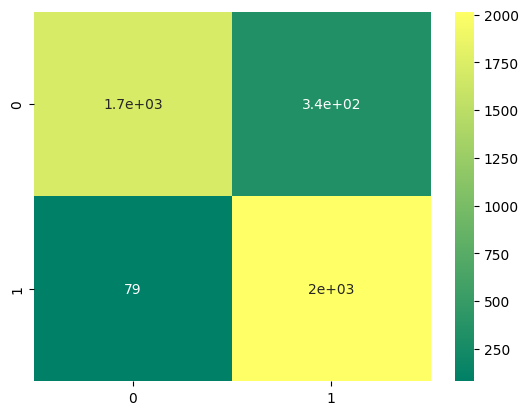

In [50]:
#confusion matrix and Naive Bayes Algorithm
y_act=y_test
y_pred=VotingClassifiers.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

In [51]:
#2. Decision Tree Algorithm

model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test,y_test))

0.819538424359594
0.8197196713388111


In [52]:
Decision_Tree_classifier = (model2.score(x_train,y_train),(model2.score(x_test,y_test)))
Decision_Tree_classifier

(0.819538424359594, 0.8197196713388111)

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      2043
           1       0.75      0.96      0.84      2095

    accuracy                           0.82      4138
   macro avg       0.85      0.82      0.82      4138
weighted avg       0.84      0.82      0.82      4138



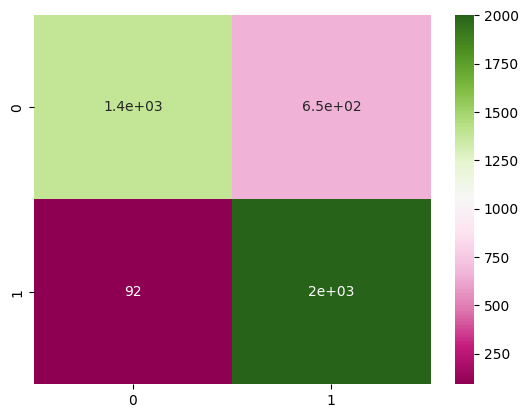

In [53]:
#confusion matrix and Decision Tree Algorithm
y_act=y_test
y_pred=model2.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

In [54]:
#3. RandomForest Algorithm

classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(x_train, y_train)
print('Training score:',classifiers.score(x_train, y_train))
print('Testing score:',classifiers.score(x_test,y_test))
#print(classifiers.best_estimator_)

Training score: 0.90170372160464
Testing score: 0.8975350410826486


In [55]:
Random_forest = (classifiers.score(x_train,y_train),(classifiers.score(x_test,y_test)))
Random_forest

(0.90170372160464, 0.8975350410826486)

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      2043
           1       0.86      0.95      0.90      2095

    accuracy                           0.90      4138
   macro avg       0.90      0.90      0.90      4138
weighted avg       0.90      0.90      0.90      4138



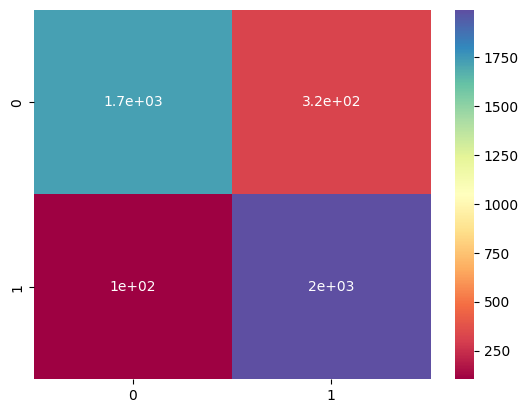

In [56]:
#confusion matrix and RandomForest Algorithm
y_act=y_test
y_pred=classifiers.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral')
print(classification_report(y_act,y_pred))

In [57]:
#4. K-Nighbor Aligorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
model = RandomizedSearchCV(KNeighborsClassifier(),{'n_neighbors':[4],'metric':['manhattan','minkowski','cosine'],
                                                   'p':[1,2]},random_state=2,n_jobs=-1)
model.fit(x_train, y_train)
RandomizedSearch_KNeighborsClassifier = (model.score(x_train,y_train),(model.score(x_test,y_test)))
RandomizedSearch_KNeighborsClassifier



(0.9344490091831803, 0.9142097631706139)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2043
           1       0.92      0.91      0.91      2095

    accuracy                           0.91      4138
   macro avg       0.91      0.91      0.91      4138
weighted avg       0.91      0.91      0.91      4138



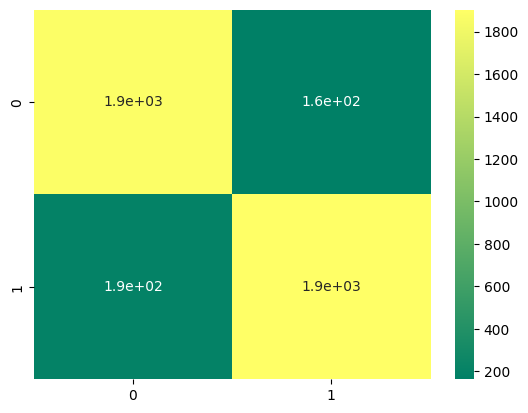

In [58]:
#confusion matrix and K-Nighbor Aligorithm 
y_act = y_test
y_pred = model.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer')
print(classification_report(y_act,y_pred))

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
#5. LogisticRegression Aligorithm
from sklearn.linear_model import LogisticRegression
params_LR = {'C' : [10, 5, 1,0.7, 0.5,0.3]}
# C = 0.5 gives the best result after Grid Search.
model = GridSearchCV(estimator = LogisticRegression(class_weight = 'balanced', random_state = 6),param_grid = params_LR, 
                      cv = 3, refit = True, scoring = 'accuracy', n_jobs = 4)

In [61]:
model.fit(x_train, y_train)
LogisticRegression = (model.score(x_train,y_train),(model.score(x_test,y_test)))
LogisticRegression

(0.8970517158047366, 0.9059932334461093)

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      2043
           1       0.88      0.95      0.91      2095

    accuracy                           0.91      4138
   macro avg       0.91      0.91      0.91      4138
weighted avg       0.91      0.91      0.91      4138



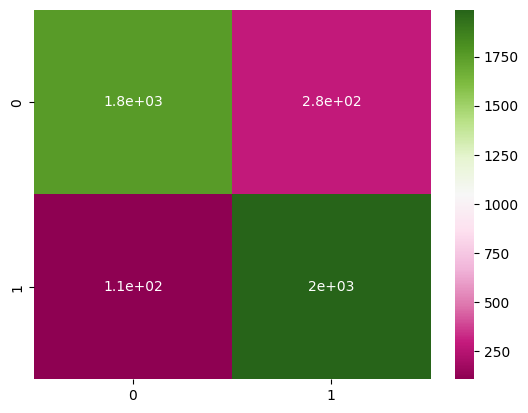

In [62]:
#confusion matrix and LogisticRegression Aligorithm
y_act = y_test
y_pred = model.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PiYG')
print(classification_report(y_act,y_pred))

In [63]:
#6. Support Vector Machine Algorithm
from sklearn.svm import SVC

In [64]:
# Here we are iteratively doing grid search with different hyperparameters in an informed manner.
params_svc = {'kernel' : ['rbf', 'sigmoid'], 'C' : [100, 150, 200]}   # 100 and 'rbf' give the best combination.

In [65]:
SVM = GridSearchCV(estimator = SVC(class_weight = 'balanced', random_state = 6), param_grid = params_svc, 
                       scoring = 'accuracy', n_jobs = 4, cv = 3, refit = True, verbose = 2)

In [66]:
SVM.fit(x_train, y_train)
print('Training score:',SVM.score(x_train, y_train))
print('Testing score:',SVM.score(x_test,y_test))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Training score: 0.9292532624456259
Testing score: 0.9238762687288545


In [67]:
SupportVecterMachine = (SVM.score(x_train,y_train),(SVM.score(x_test,y_test)))
SupportVecterMachine

(0.9292532624456259, 0.9238762687288545)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2043
           1       0.91      0.95      0.93      2095

    accuracy                           0.92      4138
   macro avg       0.93      0.92      0.92      4138
weighted avg       0.92      0.92      0.92      4138



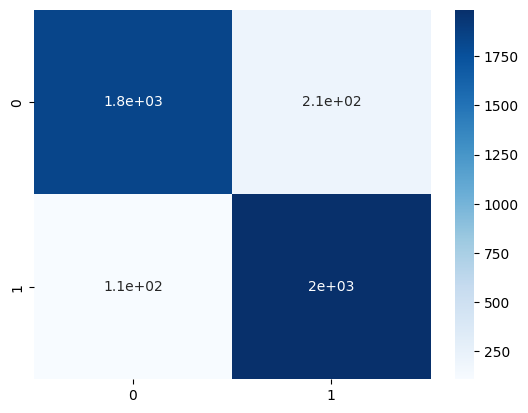

In [68]:
#confusion matrix and Support Vector Machine Algorithm
y_act=y_test
y_pred=SVM.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Blues')
print(classification_report(y_act,y_pred))

In [69]:
score_data = {'Naive Bayes': votingclassifier,
              'DecisionTree': Decision_Tree_classifier,
              'Random forest': Random_forest,
              'KNeighbors': RandomizedSearch_KNeighborsClassifier,
              'support vecter machine': SupportVecterMachine,
              'Logistic Regression': LogisticRegression}
score_df = pd.DataFrame(score_data).T
score_df.rename(columns = {0:'Train Accuracy',1:'Test Accuracy'}, inplace = True)
score_df

,Train Accuracy,Test Accuracy
Naive Bayes,0.894273,0.899710
DecisionTree,0.819538,0.819720
Random forest,0.901704,0.897535
KNeighbors,0.934449,0.914210
support vecter machine,0.929253,0.923876
Logistic Regression,0.897052,0.905993
